This script can be use to perform z-score normalization of all images belonging to a certain database.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Calculate mean
def Mean(Datapath):
    '''
    This function calculates the mean per pixel for the complete train set
    The datapath indicates where all data arrays can be found 
    '''
        
    train_images = np.load(Datapath + 'train_images.npy')
    train_images = train_images/255
        
    intermediate_mean = np.mean(train_images, axis = 3)
    mean = np.mean(intermediate_mean, axis = 0)
    
    return mean

In [3]:
def Variance(Datapath_Array, totalmean):
    '''
    This function calculates the variance per pixel for all images of an array
    Datapath_array indicates the datapath for the array
    '''
    train_images = np.load(Datapath_Array)
    train_images = train_images/255
    m = train_images.shape[0]

    # calculate the variance per channel
    R_chan = train_images[:,:,:,0]
    G_chan = train_images[:,:,:,1]
    B_chan = train_images[:,:,:,2]
        
    var_R = np.sum((R_chan-totalmean)**2, axis = 0)
    var_G = np.sum((G_chan-totalmean)**2, axis = 0)
    var_B = np.sum((B_chan-totalmean)**2, axis = 0)
        
    # bring all channels together
    var = np.sum(np.stack([var_R, var_G, var_B], axis = 0), axis = 0)
        
    return var, m

In [4]:
# Calculate standard deviation
def StandardDeviation(Datapath, TotalMean):
    '''
    This function calculates the standard deviation per pixel for the complete train set
    The datapath indicates where all data arrays can be found
    '''
    
    # define the variance for the different datapaths
    var, m = Variance(Datapath+'train_images.npy', TotalMean)
    
    total_std_dev = np.sqrt( 1/(m) * var)
    
    return total_std_dev
    

In [5]:
def ZscoreNormalization(Datapath_Array, mean, std_dev):
    '''
    This function performs z-score normalization for all images found at
    the indicated data path (Datapath_Array) according to the indicated mean and std_dev
    The normalized arrays are stored at the end
    '''
    
    print('Z-score normalization for: {}'.format(Datapath_Array))
    
    # read in the data array
    im_array = np.load(Datapath_Array)
    im_array = im_array/255

    # normalization can be done per color channel
    # channels have to be brought back together again at the end
    R_chan = im_array[:,:,:,0]
    G_chan = im_array[:,:,:,1]
    B_chan = im_array[:,:,:,2]
        
    norm_R_chan = (R_chan - mean)/std_dev
    norm_G_chan = (G_chan - mean)/std_dev
    norm_B_chan = (B_chan - mean)/std_dev
        
    norm_im_array = np.stack((norm_R_chan, norm_G_chan, norm_B_chan), axis = 3)
        
    # saving the normalized array
    savepath = Datapath_Array[:-4] +'_Final.npy'
    np.save(savepath, norm_im_array)

In [6]:
def Normalization(Datapath):
    '''
    This function normalizes all images (train and test images) that are found as arrays
    at the given Datapath
    Normalization is done according to z-score normalization and
    the same mean and standard deviation are used for the test set as calculated for the train set
    '''

    # calculate the mean on the train images
    print('Calculating the mean...')
    total_mean = Mean(Datapath)
    
    # calculate the standard deviation on the train images
    print('Calculating the standard deviation...')
    total_stddev = StandardDeviation(Datapath, total_mean)
    
    # perform z-score normalization for all train images
    ZscoreNormalization(Datapath + 'train_images.npy', total_mean, total_stddev)
    
    # perform z-scor normalization for all test images
    ZscoreNormalization(Datapath + 'test_images.npy', total_mean, total_stddev)
    
    print('Done')

In [7]:
# normalization has to be done for different datapaths
Base = 'C:/Users/lunam/Documents/1steMaster/Stage/Data/'
DataPath = Base + 'Kaggle/Arrays/'

In [9]:
Normalization(DataPath)

Below some tests are performed on the normalised arrays

In [2]:
def PlotImage(image_array, database = '', image_name = '', save = False, savepath = ''):
    '''Visualize (and save if desired) an image represented by a numpy array'''
    
    plt.figure()
    plt.title(database+': '+image_name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.imshow(image_array, cmap=plt.cm.Greys_r)
    
    if save == True:
        plt.savefig(savepath+database+'_'+image_name+'.png')
    
    return 

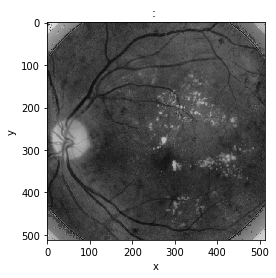

In [22]:
train_images = np.load('C:/Users/lunam/Documents/1steMaster/Stage/Data/IDRiD/HardExudates/Arrays/train_images_Final.npy')
PlotImage(np.float32(train_images[10,:,:,1]))